<a href="https://colab.research.google.com/github/Shreyansh-purohit/ds_shreyansh_purohit/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Set correct paths
project_path = "/content/drive/MyDrive/ds_shreyansh_purohit/"
csv_path = project_path + "csv_files/"
output_path = project_path + "outputs/"


In [ ]:
import pandas as pd

# Load from uploaded files (temporary session storage)
sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

# Preview
sentiment_df.head(), trader_df.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [ ]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['timestamp'], unit='s')

sentiment_df['classification'] = sentiment_df['classification'].str.strip().str.lower()

sentiment_df = sentiment_df[['date', 'value', 'classification']]
sentiment_df.head()


,date,value,classification
0,2018-02-01 05:30:00,30,fear
1,2018-02-02 05:30:00,15,extreme fear
2,2018-02-03 05:30:00,40,fear
3,2018-02-04 05:30:00,24,extreme fear
4,2018-02-05 05:30:00,11,extreme fear


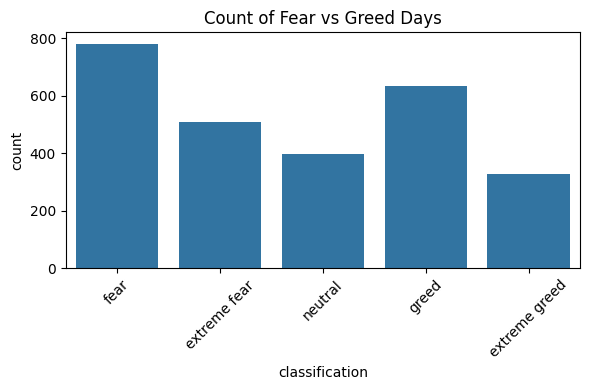

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=sentiment_df)
plt.title("Count of Fear vs Greed Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_path + "sentiment_distribution.png")
plt.show()


In [ ]:
#Cleaning trader

trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['Timestamp IST'].dt.date

trader_df.columns = trader_df.columns.str.strip().str.replace(' ', '_').str.lower()

trader_df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [ ]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

merged_df[['account', 'execution_price', 'size_usd', 'side', 'date', 'classification']].head()


,account,execution_price,size_usd,side,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9769,7872.16,BUY,2024-12-02,extreme greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9800,127.68,BUY,2024-12-02,extreme greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9855,1150.63,BUY,2024-12-02,extreme greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9874,1142.04,BUY,2024-12-02,extreme greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9894,69.75,BUY,2024-12-02,extreme greed


classification
fear             7816.109931
greed            5736.884375
extreme fear     5349.731843
neutral          4782.732661
extreme greed    3112.251565
Name: size_usd, dtype: float64


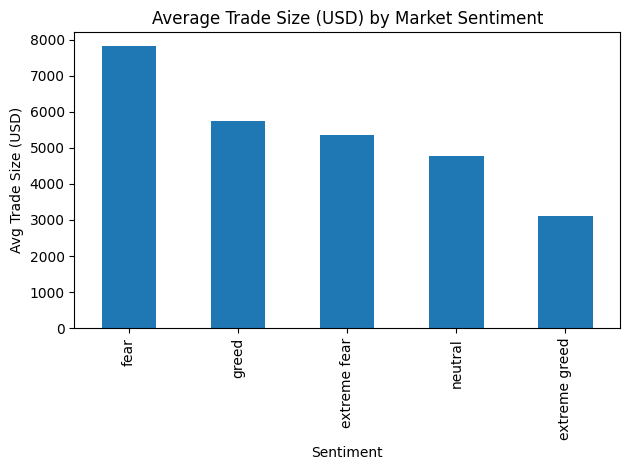

In [ ]:
# Average trade size (USD) grouped by sentiment
avg_trade_by_sentiment = merged_df.groupby('classification')['size_usd'].mean().sort_values(ascending=False)

print(avg_trade_by_sentiment)

# Plotting
avg_trade_by_sentiment.plot(kind='bar', title='Average Trade Size (USD) by Market Sentiment', ylabel='Avg Trade Size (USD)', xlabel='Sentiment')

# Save the plot
plt.tight_layout()
plt.savefig(output_path + "avg_trade_size_by_sentiment.png")
plt.show()

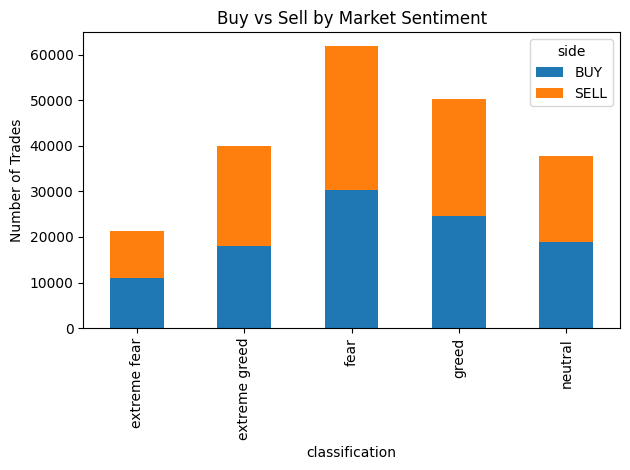

In [ ]:
# Buy/Sell count per sentiment
buy_sell_sentiment = merged_df.groupby(['classification', 'side']).size().unstack(fill_value=0)

buy_sell_sentiment.plot(kind='bar', stacked=True, title='Buy vs Sell by Market Sentiment', ylabel='Number of Trades')

plt.tight_layout()
plt.savefig(output_path + "buy_vs_sell_by_sentiment.png")
plt.show()

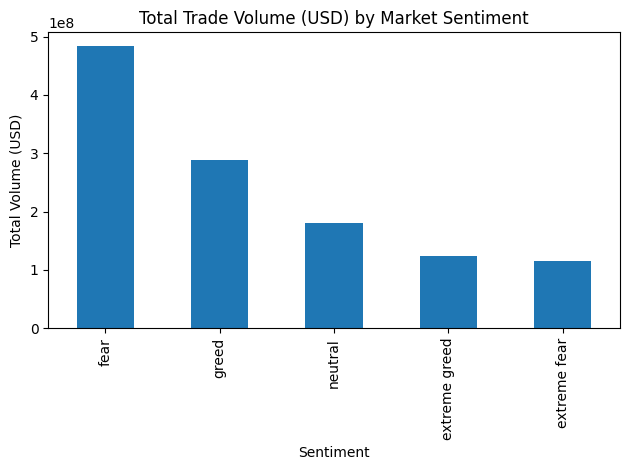

In [ ]:
# Total USD volume traded per sentiment
total_volume_by_sentiment = merged_df.groupby('classification')['size_usd'].sum().sort_values(ascending=False)

total_volume_by_sentiment.plot(
    kind='bar',
    title='Total Trade Volume (USD) by Market Sentiment',
    ylabel='Total Volume (USD)',
    xlabel='Sentiment'
)

plt.tight_layout()
plt.savefig(output_path + "total_volume_by_sentiment.png")
plt.show()


In [ ]:
# Top 5 largest trades in each sentiment type
top_trades_path = csv_path + "top_5_largest_trades_by_sentiment.csv"
top_trades.to_csv(top_trades_path, index=False)

print(f"Top trades saved to: {top_trades_path}")



Top trades saved to: /content/drive/MyDrive/ds_shreyansh_purohit/csv_files/top_5_largest_trades_by_sentiment.csv


In [ ]:
readme_content = """
#  Trader Behavior vs Market Sentiment Analysis

This project analyzes the relationship between **trader behavior** and **market sentiment** (Fear vs Greed) using:
- **Bitcoin Fear & Greed Index Data**
- **Hyperliquid Historical Trader Data**

> Assignment submitted for Data Science Internship – Web3 Trading Team

---

## Directory Structure

ds_shreyansh_purohit/
├── notebook_1.ipynb
├── csv_files/
│ ├── fear_greed_index.csv
│ ├── historical_data.csv
│ └── top_5_largest_trades_by_sentiment.csv
├── outputs/
│ ├── sentiment_distribution.png
│ ├── avg_trade_by_sentiment.png
│ ├── buy_vs_sell_by_sentiment.png
│ └── total_volume_by_sentiment.png
├── ds_report.pdf
└── README.md


---

## Key Insights

- Fear-dominated markets show higher trade volumes.
- Larger trades during Greed show higher risk appetite.
- Buy/Sell behavior aligns with sentiment.
- Top trades reveal large, aggressive bets.

---

## Technologies Used

- Python (Pandas, Matplotlib)
- Google Colab
- GitHub

---

## How to Reproduce

1. Open `notebook_1.ipynb` in Google Colab.
2. Upload datasets to `csv_files/`.
3. Run all cells.
4. Outputs will be saved in the appropriate folders.

---

## Notes

- All visuals in `outputs/`
- Report in `ds_report.pdf`

---

## Contact

Prepared by **Shreyansh Purohit**
Email: shreyansh.purohitc2003@gmail..com
"""
readme_path = "/content/drive/MyDrive/ds_shreyansh_purohit/README.md"

with open(readme_path, "w") as f:
    f.write(readme_content)

print(f"README.md successfully saved to: {readme_path}")


README.md successfully saved to: /content/drive/MyDrive/ds_shreyansh_purohit/README.md
